#### Representatives extraction from bgsu database (3A resolution constraint)
[Link](http://rna.bgsu.edu/rna3dhub/nrlist/release/3.242/3.0A)

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
from rna2d.pipelines import BGSURepresentatives
PATH = "../external-files/nrlist_3.242_3.0A.csv"
bgsu = BGSURepresentatives()
pdbs = bgsu.extract_representatives(PATH)
with open('../metadata/representants.txt', 'w') as f:
    out = "\n".join(pdbs)
    f.writelines(out)

In [20]:
import os
train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
test_pdbs1 = "../external-files/PDB_dataset/TS1_sequences/"
test_pdbs2 = "../external-files/PDB_dataset/TS2_sequences/"

def get_pdb_ids(path):
    pdbs = os.listdir(path)
    pdbs = [p.replace("-", "_") for p in pdbs]
    pdbs = [f'{p[:4].upper()}{p[4:]}' for p in pdbs]
    return pdbs

trpdbs = get_pdb_ids(train_pdbs)
tspdbs1 = get_pdb_ids(test_pdbs1)
tspdbs2 = get_pdb_ids(test_pdbs2)
tspdbs1.extend(tspdbs2)
print(trpdbs[:10])
print(len(trpdbs), len(tspdbs1), len(tspdbs2))

['3SKI_1_A', '2HVY_1_E', '4PMI_1_A', '1FFK_1_9', '2CSX_1_C', '2ZNI_1_C', '4Y1J_1_A', '4KZD_1_R', '4V83_1_AV', '2A64_1_A']
120 106 39


Cząsteczki ze zbioru treningowego SPOT-RNA wśród reprezentantów:

In [22]:
intersection = set(pdbs).intersection(trpdbs)
diffrerence = set(pdbs).difference(trpdbs)
print(f'Intersection: {len(intersection)}')
print(f'Diffrefence: {len(diffrerence)}')
with open("../metadata/representants-filtered-training.txt", 'w') as f:
    out = "\n".join(diffrerence)
    f.writelines(out)

Intersection: 57
Diffrefence: 1589


In [23]:
%autoreload 2
from rna2d.pipelines import Results

all_path = "/data/2d-rna/validation-all-non0/results.rpt"
wc_path = "/data/2d-rna/validation-canon-non0/results.rpt"
rall = Results(all_path)
rwc = Results(wc_path)

all_res, all_ind = rall.run_for_all()
all_fres, all_find = rall.filter_by_molecules(all_res, all_ind, "../metadata/representants-filtered-training.txt")
print(len(all_res['spot-rna']), len(all_fres['spot-rna']))

wc_res, wc_ind = rwc.run_for_all()
wc_fres, wc_find = rwc.filter_by_molecules(wc_res, wc_ind, "../metadata/representants-filtered-training.txt")
print(len(wc_res['spot-rna']), len(wc_fres['spot-rna']))

7354 497
7230 461


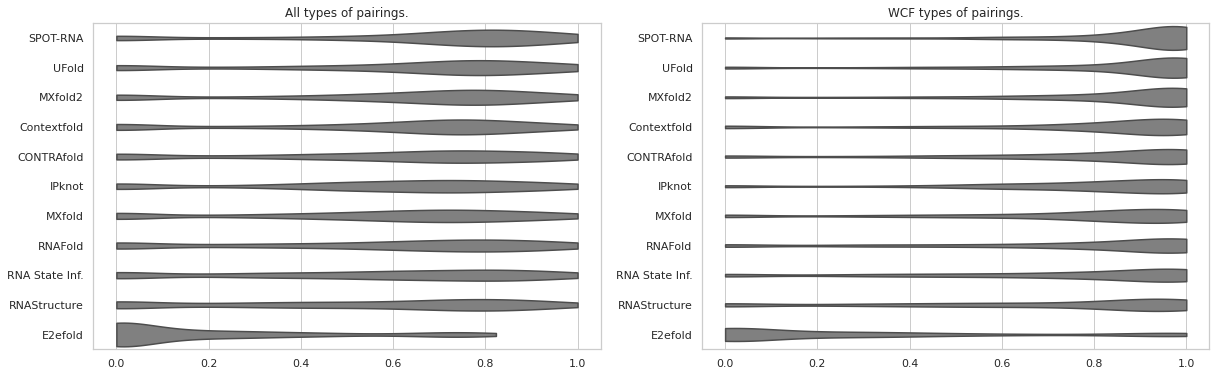

In [24]:
%autoreload 2
from rna2d.visualization import Violinplot
from rna2d.visualization import SeabornData
import matplotlib.pyplot as plt

v = Violinplot()
sall = SeabornData(all_fres, all_find)
swc = SeabornData(wc_fres, wc_find)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns_all = sall.get_sns_format_data()
sns_wc = swc.get_sns_format_data()
v.plot(sns_all, axs[0], "All types of pairings.", x_axis=False)
v.plot(sns_wc, axs[1], "WCF types of pairings.", x_axis=False)



,PPV,TPR,F1,INF
spot-rna,0.59,0.81,0.67,0.69
ufold,0.54,0.76,0.62,0.63
mxfold2,0.51,0.76,0.60,0.62
contextFold,0.48,0.75,0.58,0.59
contrafold,0.49,0.70,0.57,0.58
ipknot,0.48,0.72,0.56,0.58
rnafold,0.49,0.69,0.56,0.58
mxfold,0.46,0.72,0.55,0.57
rna-state-inf,0.47,0.68,0.55,0.56
rna-structure,0.44,0.65,0.52,0.53
